In [18]:
from multiprocessing import context
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks='True', grid='False')

In [19]:
%pip install <tensorflow>

Note: you may need to restart the kernel to use updated packages.


The syntax of the command is incorrect.


In [20]:
mining_df = pd.read_csv('mining_data.csv')
mining_df
print(mining_df.dtypes)

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object


% Iron Feed                     False
% Silica Feed                   False
Starch Flow                     False
Amina Flow                      False
Ore Pulp Flow                   False
Ore Pulp pH                     False
Ore Pulp Density                False
Flotation Column 01 Air Flow    False
Flotation Column 02 Air Flow    False
Flotation Column 03 Air Flow    False
Flotation Column 04 Air Flow    False
Flotation Column 05 Air Flow    False
Flotation Column 06 Air Flow    False
Flotation Column 07 Air Flow    False
Flotation Column 01 Level       False
Flotation Column 02 Level       False
Flotation Column 03 Level       False
Flotation Column 04 Level       False
Flotation Column 05 Level       False
Flotation Column 06 Level       False
Flotation Column 07 Level       False
% Iron Concentrate              False
% Silica Concentrate            False
dtype: bool
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow  

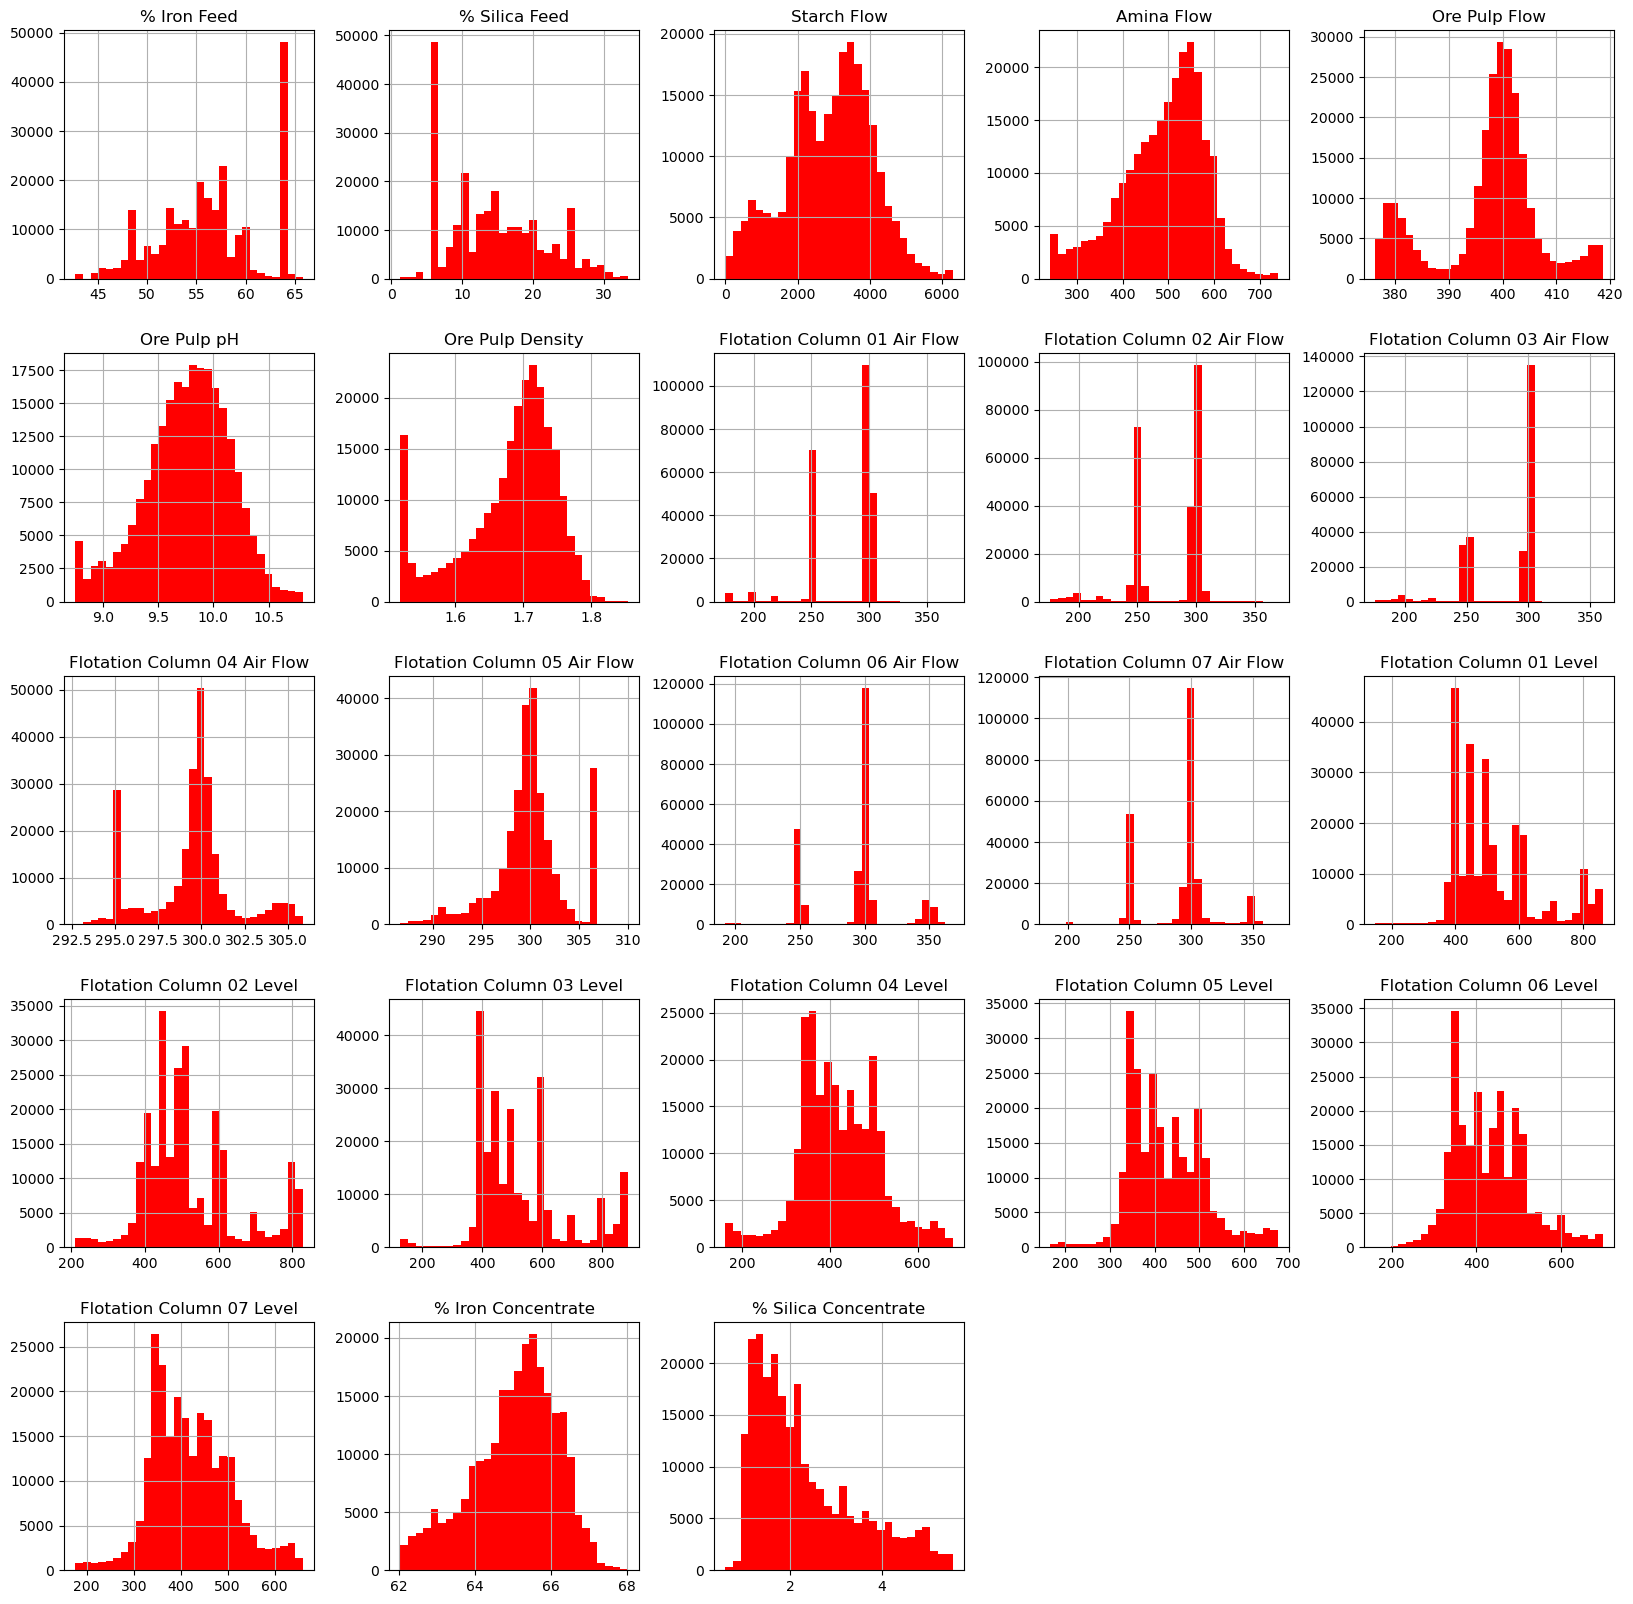

In [21]:
print(mining_df.isnull().any())
print(mining_df.isnull().sum())

print(mining_df['% Silica Concentrate'].min())
print(mining_df['% Silica Concentrate'].max())
print(mining_df['% Silica Concentrate'].describe())
print(mining_df['% Silica Concentrate'].mean())


from turtle import color

mining_df.hist(bins=30, figsize=(20,20),color='red')
plt.show()

In [22]:
mining_df.corr()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.971837,0.028644,-0.088595,0.164676,0.007496,-0.125583,-0.062448,-0.170716,-0.062318,...,-0.016722,0.029619,0.020928,0.015189,0.016346,0.023571,0.003910,0.026100,0.055526,-0.077108
% Silica Feed,-0.971837,1.000000,-0.016489,0.079065,-0.154508,0.007953,0.104567,0.091833,0.183953,0.084325,...,0.046193,-0.038417,-0.037113,-0.022653,-0.034534,-0.044270,-0.020568,-0.047079,-0.044292,0.072778
Starch Flow,0.028644,-0.016489,1.000000,0.261934,0.044926,0.269135,0.231530,0.195538,0.192244,0.187602,...,0.202817,-0.302567,-0.286336,-0.309177,-0.013037,-0.057417,-0.077105,-0.039584,0.071303,-0.068008
Amina Flow,-0.088595,0.079065,0.261934,1.000000,0.219162,0.124254,0.659461,0.111994,0.124490,0.102632,...,0.081561,-0.270753,-0.236452,-0.288484,-0.183739,-0.215334,-0.209496,-0.171384,-0.111045,0.157644
Ore Pulp Flow,0.164676,-0.154508,0.044926,0.219162,1.000000,0.121256,0.012571,-0.141215,-0.122322,-0.144232,...,-0.146904,-0.008877,-0.008335,-0.055890,-0.010212,0.002158,-0.018051,0.017185,0.085098,0.008519
Ore Pulp pH,0.007496,0.007953,0.269135,0.124254,0.121256,1.000000,0.115073,0.163433,0.146264,0.193887,...,0.178322,-0.166525,-0.154391,-0.140251,0.046933,0.013095,-0.079157,0.019193,0.192705,-0.147550
Ore Pulp Density,-0.125583,0.104567,0.231530,0.659461,0.012571,0.115073,1.000000,-0.004695,0.026413,-0.031237,...,-0.052655,-0.112201,-0.093542,-0.149823,-0.089066,-0.142675,-0.105346,-0.087454,0.015116,0.047413
Flotation Column 01 Air Flow,-0.062448,0.091833,0.195538,0.111994,-0.141215,0.163433,-0.004695,1.000000,0.854298,0.955256,...,0.658199,-0.443870,-0.428294,-0.372533,-0.062665,-0.092254,-0.125196,-0.112074,0.099239,-0.219698
Flotation Column 02 Air Flow,-0.170716,0.183953,0.192244,0.124490,-0.122322,0.146264,0.026413,0.854298,1.000000,0.866927,...,0.592888,-0.437313,-0.428303,-0.368913,-0.075833,-0.112465,-0.124478,-0.114693,0.059709,-0.169029
Flotation Column 03 Air Flow,-0.062318,0.084325,0.187602,0.102632,-0.144232,0.193887,-0.031237,0.955256,0.866927,1.000000,...,0.661261,-0.443454,-0.423836,-0.365800,-0.047216,-0.064355,-0.105673,-0.086448,0.100888,-0.219593


<AxesSubplot:>

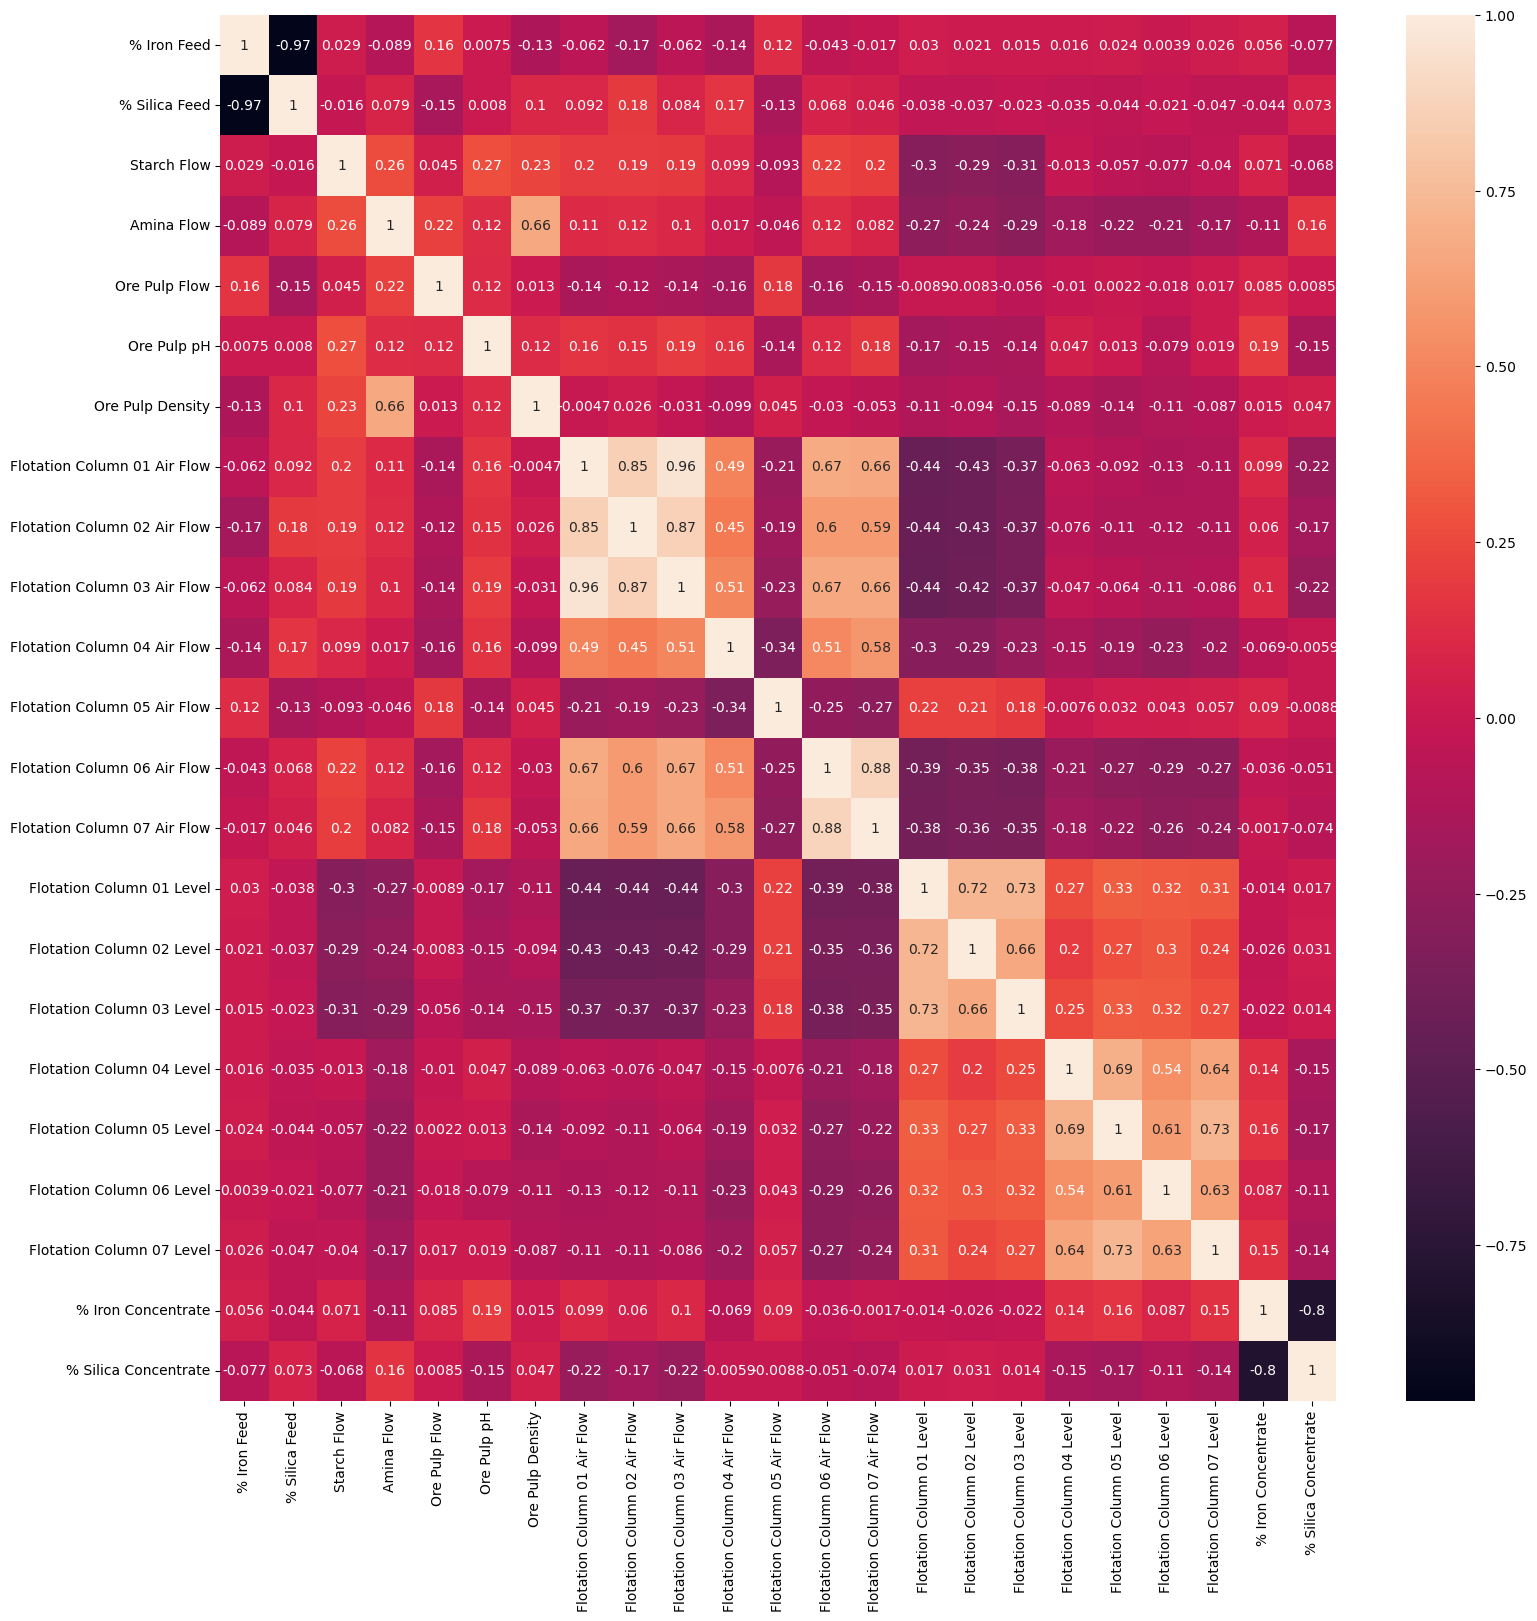

In [23]:
plt.figure(figsize=(18,18))
sns.heatmap(mining_df.corr(), annot=True)

c:\Users\Lenovo\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='% Silica Concentrate', ylabel='% Iron Concentrate'>

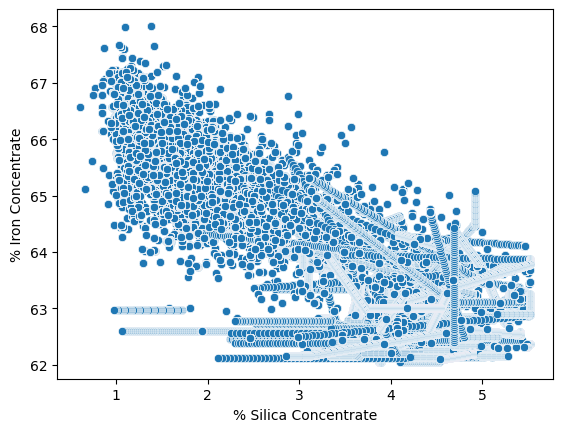

In [24]:
sns.scatterplot(mining_df['% Silica Concentrate'], mining_df['% Iron Concentrate'])


c:\Users\Lenovo\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='% Silica Feed', ylabel='% Iron Feed'>

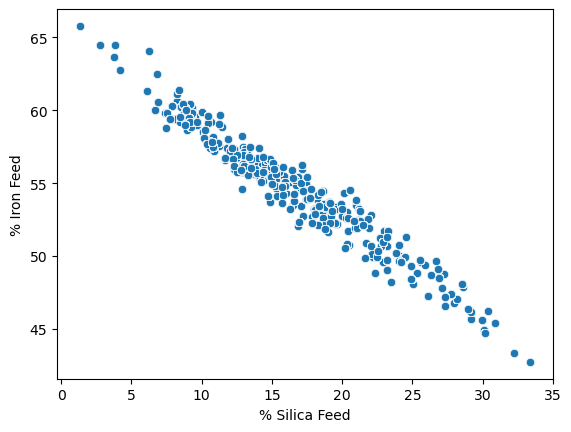

In [25]:
sns.scatterplot(mining_df['% Silica Feed'], mining_df['% Iron Feed'])

In [26]:
df_iron = mining_df.drop(columns='% Silica Concentrate')
df_iron_target = mining_df['% Silica Concentrate']

In [27]:
# I need to look up why we have to make it a np array????????? >>>>>>>>>>>> apparently when doing the preprocessing with StandardScaler, the input should be an array
df_iron = np.array(df_iron)
df_iron_target = np.array(df_iron_target)
df_iron_target


array([1.11, 1.11, 1.11, ..., 1.71, 1.71, 1.71])

In [28]:
df_iron_target = df_iron_target.reshape(-1,1)
df_iron_target

array([[1.11],
       [1.11],
       [1.11],
       ...,
       [1.71],
       [1.71],
       [1.71]])

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler_x = StandardScaler()
X = scaler_x.fit_transform(df_iron)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(df_iron_target)


Text(0, 0.5, 'prediction')

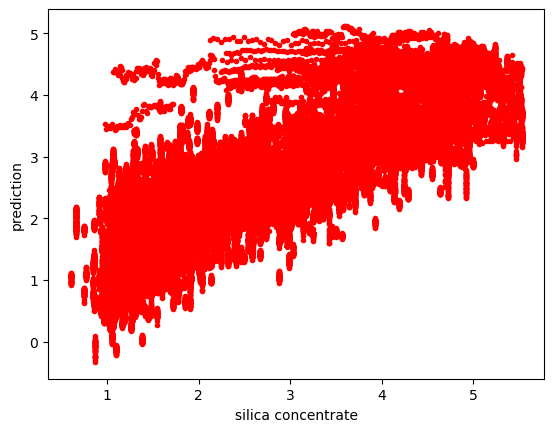

In [79]:
# build a linear regression model with the whole data(Unsupervised learning)

mylinearmodel = LinearRegression()
mylinearmodel.fit(df_iron, df_iron_target)

yhat = mylinearmodel.predict(df_iron)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(yhat, df_iron_target)
mse
plt.plot( df_iron_target,yhat,'.', color='r')
plt.xlabel('silica concentrate')
plt.ylabel('prediction')

In [30]:
# supervised learning

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# build a linear regression model with the training data

lrm = LinearRegression()
lrm.fit(X_train, y_train)

model_accuracy = lrm.score(X_test, y_test)
model_accuracy


0.6802812385793019

In [33]:
# build a decision tree for the training data

from sklearn.tree import DecisionTreeRegressor

DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)


accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.9823266220362287

In [34]:
# build a random forest for the training data

from sklearn.ensemble import RandomForestRegressor

ForestRegression_model = RandomForestRegressor(n_estimators=80,max_depth=10)
ForestRegression_model.fit(X_train, y_train)

accuracy_ForestRegression = ForestRegression_model.score(X_test, y_test)
accuracy_ForestRegression


c:\Users\Lenovo\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8868700586859712

In [35]:
# build a neural network for the training 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [36]:
from unittest import result


optimizer = Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-7, amsgrad=False)
ANN_model = keras.Sequential()
ANN_model.add(Dense(250, input_dim=22, kernel_initializer='normal', activation='relu'))
ANN_model.add(Dense(500, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(500, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250, activation='relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1, activation='linear'))
ANN_model.compile(loss = 'mse', optimizer= 'adam')
ANN_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 250)               5750      
                                                                 
 dense_10 (Dense)            (None, 500)               125500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_11 (Dense)            (None, 1000)              501000    
                                                                 
 dropout_6 (Dropout)         (None, 1000)              0         
                                                                 
 dense_12 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_7 (Dropout)         (None, 1000)             

In [38]:
history = ANN_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
4914/4914 [==============================] - 92s 19ms/step - loss: 0.0916 - val_loss: 0.0868
Epoch 2/10
4914/4914 [==============================] - 129s 26ms/step - loss: 0.0833 - val_loss: 0.0768
Epoch 3/10
4914/4914 [==============================] - 102s 21ms/step - loss: 0.0806 - val_loss: 0.0708
Epoch 4/10
4914/4914 [==============================] - 118s 24ms/step - loss: 0.0769 - val_loss: 0.0663
Epoch 5/10
4914/4914 [==============================] - 142s 29ms/step - loss: 0.0735 - val_loss: 0.0633
Epoch 6/10
4914/4914 [==============================] - 130s 26ms/step - loss: 0.0721 - val_loss: 0.0607
Epoch 7/10
4914/4914 [==============================] - 122s 25ms/step - loss: 0.0719 - val_loss: 0.0638
Epoch 8/10
4914/4914 [==============================] - 137s 28ms/step - loss: 0.0670 - val_loss: 0.0548
Epoch 9/10
4914/4914 [==============================] - 151s 31ms/step - loss: 0.0684 - val_loss: 0.0619
Epoch 10/10
4914/4914 [==============================] -

In [39]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("accuracy = ", accuracy_ANN)

1536/1536 [==============================] - 8s 5ms/step - loss: 0.0565
accuracy =  0.9434592127799988


In [40]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

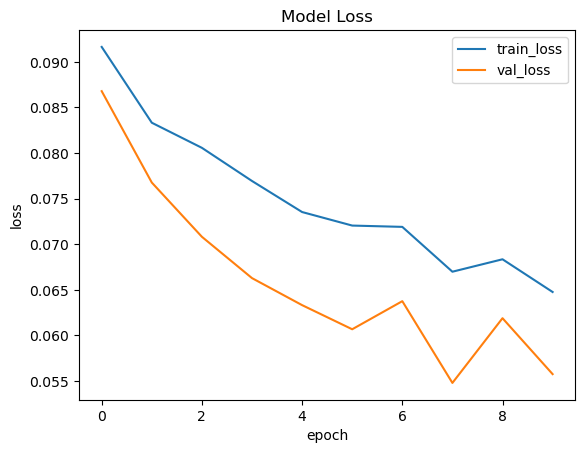

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc = 'upper right')
plt.show()

Text(0, 0.5, 'True Values')

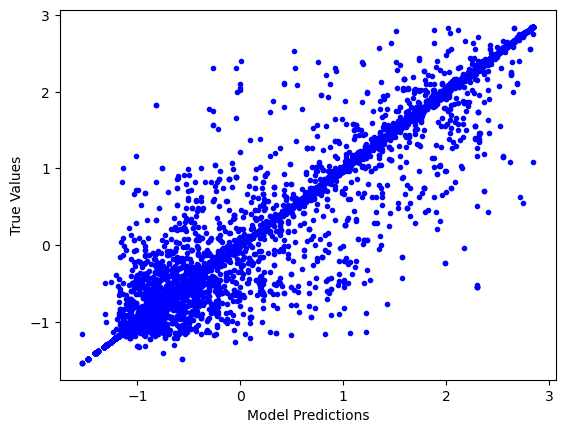

In [47]:
# so far the best model>>>>>>>>>>>Decision Tree

y_predict = DecisionTree_model.predict(X_test)
plt.plot(y_predict, y_test,'.', color='b')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


Text(0, 0.5, 'Original True Values')

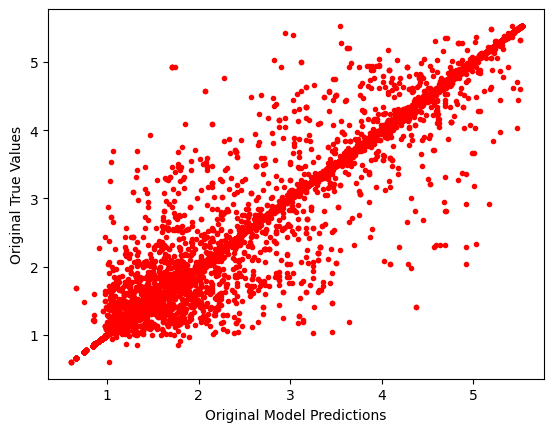

In [57]:
twoD_y_predict = y_predict.reshape(-1,1)
y_predict_orig = scaler_y.inverse_transform(twoD_y_predict)
twoD_y_test = y_test.reshape(-1,1)
y_test_orig = scaler_y.inverse_transform(twoD_y_test)
plt.plot(y_test_orig, y_predict_orig, '.', color='r')
plt.xlabel('Original Model Predictions')
plt.ylabel('Original True Values')


In [77]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

MSE = mean_squared_error(y_test_orig, y_predict_orig)
RMSE =format(np.sqrt(MSE), '.3f')
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
k = y_test_orig[1]
n = len(y_predict_orig)
adj_r2 = 1-((1-r2)*(n-1)/(n-k-1))


print('MSE= ', MSE,'   ///   ', 'RMSE= ',RMSE,'   ///   ' ,'MAE= ', MAE, '   ///   ', 'r2= ',r2, '   ///   ', 'adj r2= ', adj_r2)

MSE=  0.022403473482143926    ///    RMSE=  0.150    ///    MAE=  0.02343741058116592    ///    r2=  0.9823266220362287    ///    adj r2=  [0.9823252]
